# Neural Network test using Keras

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


# Generate data

**Mean subtraction**: Input data already has zero-mean and no need to demean.

cf) http://cs231n.github.io/neural-networks-case-study/

In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N * K,D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N * j, N * (j + 1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j * 4,(j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

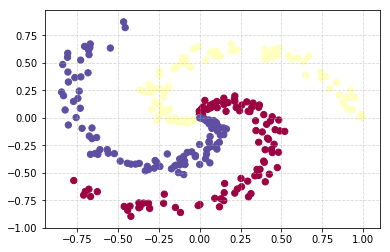

In [3]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral);

In [4]:
X[:5, :]

array([[ 0.        ,  0.        ],
       [-0.00080934,  0.01006853],
       [-0.00327018,  0.01993558],
       [ 0.01821301,  0.024219  ],
       [ 0.00086543,  0.04039477]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], d

In [6]:
print(X.shape)
print(y.shape)

(300, 2)
(300,)


# Build model via Keras

**Initial weight**: Use default params. `kernel_initializer`='glorot_uniform', `bias_initializer`='zeros'  
**Regularisation**: No regularisation  
**y**: Vector y needs to be converted by *to_categorical()*

In [7]:
model = Sequential()
model.add(Dense(100, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X, to_categorical(y, 3), batch_size=10, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 1.0575 - acc: 0.4433
Epoch 2/100
 - 0s - loss: 0.9801 - acc: 0.5600
Epoch 3/100
 - 0s - loss: 0.9149 - acc: 0.5633
Epoch 4/100
 - 0s - loss: 0.8649 - acc: 0.5567
Epoch 5/100
 - 0s - loss: 0.8191 - acc: 0.5700
Epoch 6/100
 - 0s - loss: 0.7865 - acc: 0.5700
Epoch 7/100
 - 0s - loss: 0.7576 - acc: 0.5700
Epoch 8/100
 - 0s - loss: 0.7347 - acc: 0.5767
Epoch 9/100
 - 0s - loss: 0.7161 - acc: 0.5833
Epoch 10/100
 - 0s - loss: 0.6985 - acc: 0.6033
Epoch 11/100
 - 0s - loss: 0.6858 - acc: 0.5800
Epoch 12/100
 - 0s - loss: 0.6718 - acc: 0.6067
Epoch 13/100
 - 0s - loss: 0.6587 - acc: 0.6133
Epoch 14/100
 - 0s - loss: 0.6460 - acc: 0.6233
Epoch 15/100
 - 0s - loss: 0.6360 - acc: 0.6233
Epoch 16/100
 - 0s - loss: 0.6228 - acc: 0.6433
Epoch 17/100
 - 0s - loss: 0.6125 - acc: 0.6433
Epoch 18/100
 - 0s - loss: 0.6028 - acc: 0.6400
Epoch 19/100
 - 0s - loss: 0.5924 - acc: 0.6500
Epoch 20/100
 - 0s - loss: 0.5832 - acc: 0.6533
Epoch 21/100
 - 0s - loss: 0.5701 - acc: 0.6733
E

# Result

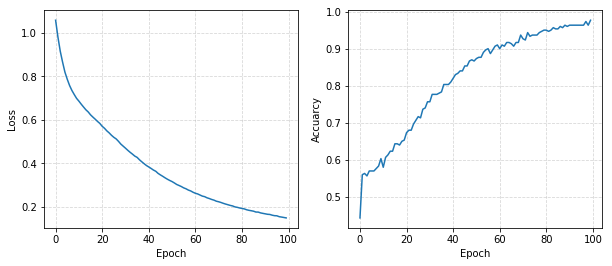

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.set_ylabel("Loss")
ax2.set_ylabel("Accuarcy")
ax1.set_xlabel("Epoch")
ax2.set_xlabel("Epoch")
ax1.plot(history.epoch, history.history["loss"])
ax2.plot(history.epoch, history.history["acc"]);

## Predict

In [11]:
def traverse(o, tree_types=(list, tuple)):
    if isinstance(o, tree_types):
        for value in o:
            for subvalue in traverse(value, tree_types):
                yield subvalue
    else:
        yield o

In [12]:
n_linspace = 100
axis_grid = np.linspace(-1.5, 1.5, n_linspace)
grid_x, grid_y = np.meshgrid(axis_grid, axis_grid)
x_test = np.array([(i, j) for i, j in zip(traverse(grid_x.tolist()), traverse(grid_y.tolist()))])

In [13]:
y_hat = model.predict(x_test)
y_hat_grid = np.argmax(y_hat, axis=1).reshape((n_linspace, n_linspace))

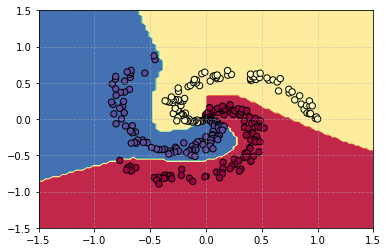

In [14]:
grid_x, grid_y = np.meshgrid(axis_grid, axis_grid)
fig, ax = plt.subplots()
ax.contourf(grid_x, grid_y, y_hat_grid, cmap=plt.cm.Spectral)
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolors='black', cmap=plt.cm.Spectral);